In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\parth\\Machine-learning\\Machine-learning\\08-Linear-Regression-Models\\Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


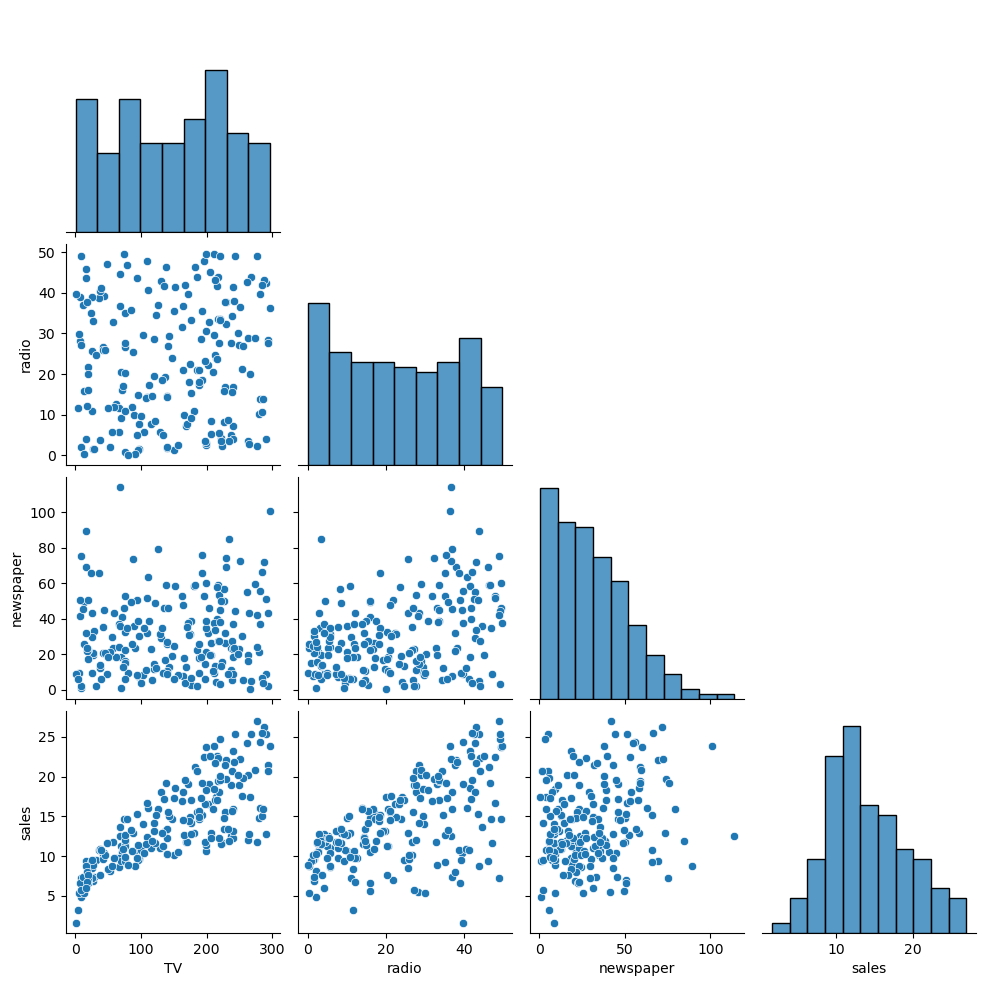

In [4]:
sns.pairplot(df,corner=True)

In [5]:
X=df.drop('sales',axis=1)

In [6]:
y=df['sales']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)
# X train means feature aur Y matlab label means past ke document ya phir data test_size matlab kitna portion data test ko bhej na hai and x,y 
# u know passing random state data ko shuffle karta hai kyu ki like agar train set me higest value aya aur test mein low toh wo analysis kuch
#  matlab nahi that why we scikit learn first shuffle the data in what percentage u specifies 
#  

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
mymodel=LinearRegression()

In [11]:
mymodel.fit(X_train,y_train)

LinearRegression()

In [12]:
test_predication=mymodel.predict(X_test)

In [13]:
test_predication

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

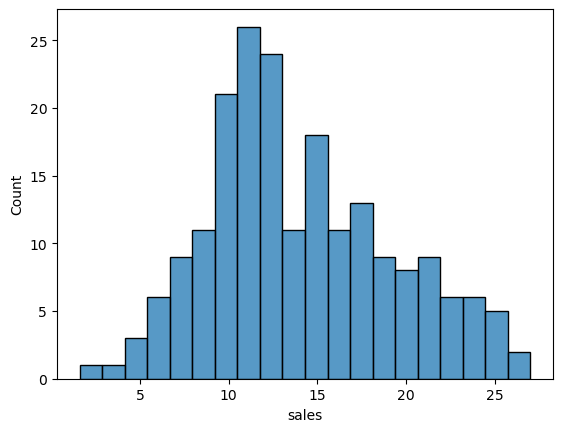

In [16]:
sns.histplot(data=df,x='sales',bins=20)

In [17]:
mean_absolute_error(y_true=y_test,y_pred=test_predication) # this function takes true value and predicted value 
# 1.51 error aya abs se so whether it is good or bad probably depends on the data as average is 14 so and error is 1.51 
# so it's less 

1.2137457736144803

In [18]:
mean_squared_error(y_test,test_predication) # this in square so we can't compare it directly 
# to fix this we have to take square root of it 


2.2987166978863782

In [19]:
np.sqrt(mean_squared_error(y_test,test_predication)) # root mean square 

1.516151937599388

Residual Plot 

In [20]:
test_residual=y_test-test_predication

In [21]:
test_residual

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

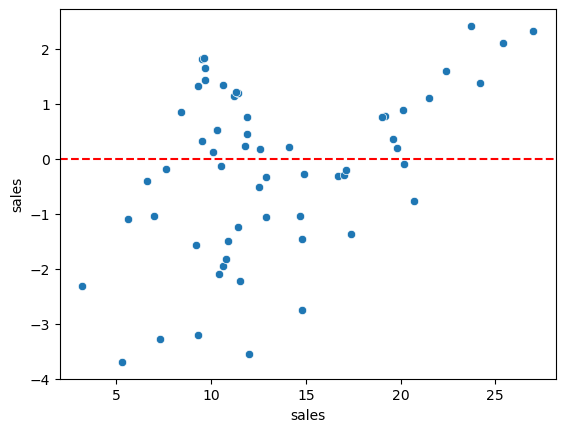

In [22]:
sns.scatterplot(x=y_test,y=test_residual) # this look random ,not any curve or straight line so we can  use linear regression
plt.axhline(y=0,color='r',ls='--')

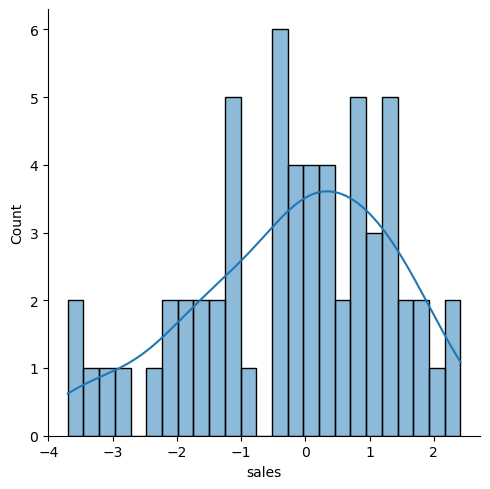

In [23]:
sns.displot(data=test_residual,bins=25,kde=True)

finalizing the model and deloyment to the real world 

In [24]:
final_model=LinearRegression()

In [25]:
final_model.fit(X,y)

LinearRegression()

In [26]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [27]:
X.head() # 1st is coefficient of tv ,2=radio,3=newspaper beta coefficient 

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


# Explanation of these array 
# like agar sirf tv ki marketing kare toh 230.1 ke age 231.1 me 0.045 ka sales me increament dekhenga 
# aur agar sirf radio ki marketing kare toh like 37.8 ke age 38.8 matlab per 1%  0.188 ka increament milenga sales 
# aur newspaper jese jese 1% karenge toh negative me sale jate jate drop hounga sales 

In [28]:
y_hat=final_model.predict(X)

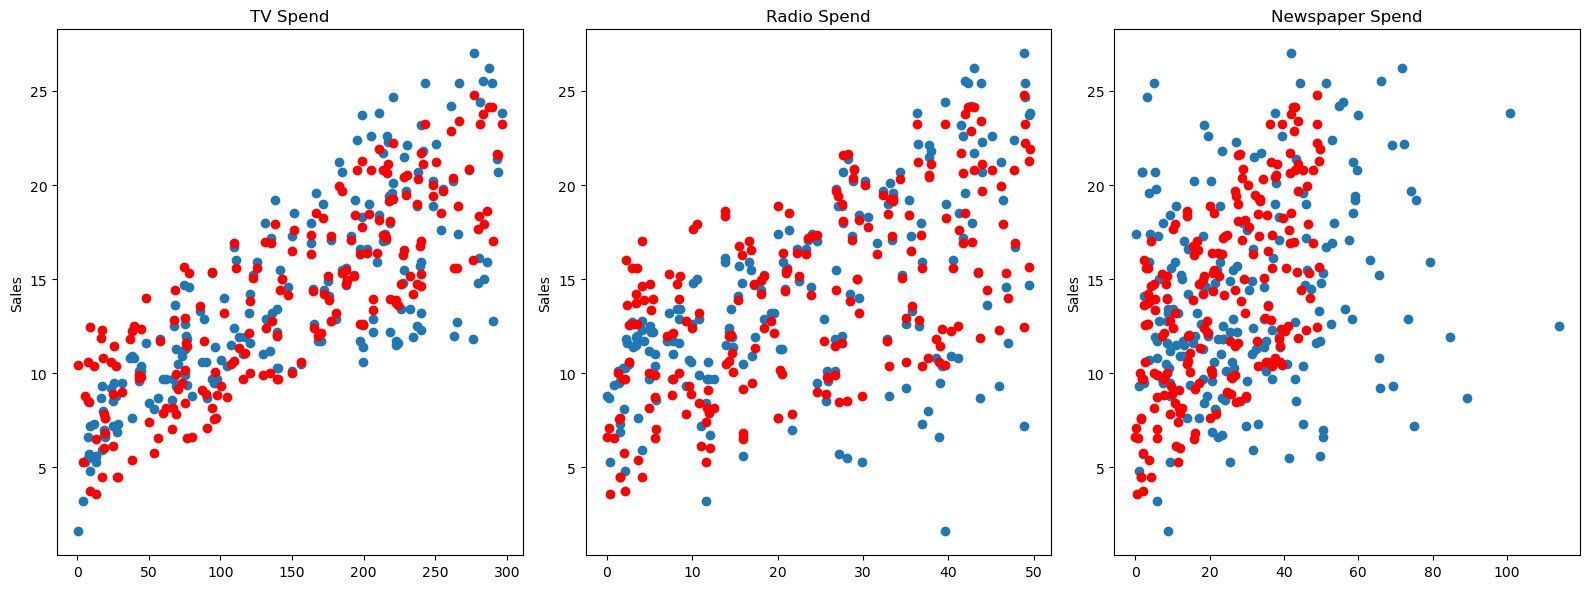

In [29]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [30]:
from joblib import dump,load

In [31]:
dump(final_model,'Final_sales_model.joblib')

['Final_sales_model.joblib']

In [32]:
load_model=load("Final_sales_model.joblib")

In [33]:
load_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [34]:
X.shape

(200, 3)

In [35]:
# ur data must have size to be inserted into the model 

In [36]:
# 149 TV ,22 radio ,11 newpapers 
# what is the sale for this particular row 
campaign=[[149,22,12]]

In [37]:
load_model.predict(campaign)

c:\Users\parth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])